In [1]:
import pandas as pd
df = pd.read_csv("EldenRingMaxWeapons.csv")
df.head()

,weapon_name,physical_dmg,magic_dmg,fire_dmg,lightning_dmg,holy_dmg,crit_multiplier,poise_dmg,strength_scaling,dexterity_scaling,...,physical_def,magic_def,fire_def,lightning_def,holy_def,guard_boost,status_resistance,weight,weapon_type,affinity
0,Rogier's Rapier (heavy),209,0,0,0,0,110,62,A,Z,...,49.0,33.0,33.0,33.0,33.0,24.2,11.0,3.5,ThrustingSwords,heavy
1,Rapier (heavy),216,0,0,0,0,130,60,B,Z,...,45.0,30.0,30.0,30.0,30.0,22.0,10.0,2.5,ThrustingSwords,heavy
2,Noble's Estoc (heavy),232,0,0,0,0,100,60,B,Z,...,49.0,33.0,33.0,33.0,33.0,24.2,11.0,3.5,ThrustingSwords,heavy
3,Estoc (heavy),239,0,0,0,0,100,66,B,Z,...,54.0,36.0,36.0,36.0,36.0,26.4,12.0,4.5,ThrustingSwords,heavy
4,Cleanrot Knight's Sword (heavy),244,0,0,0,0,100,66,B,Z,...,51.0,34.0,34.0,34.0,34.0,25.3,11.0,4.0,ThrustingSwords,heavy


In [2]:
df.shape

(1942, 23)

In [3]:
df.dtypes

weapon_name              object
physical_dmg              int64
magic_dmg                 int64
fire_dmg                  int64
lightning_dmg             int64
holy_dmg                  int64
crit_multiplier           int64
poise_dmg                object
strength_scaling         object
dexterity_scaling        object
intelligence_scaling     object
faith_scaling            object
arcane_scaling           object
physical_def            float64
magic_def               float64
fire_def                float64
lightning_def           float64
holy_def                float64
guard_boost             float64
status_resistance       float64
weight                  float64
weapon_type              object
affinity                 object
dtype: object

In [4]:
df.drop(["weapon_name"],axis=1 , inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

In [6]:
df['poise_dmg']=le.fit_transform(df['poise_dmg'])
df['strength_scaling']=le.fit_transform(df['strength_scaling'])
df['dexterity_scaling']=le.fit_transform(df['dexterity_scaling'])
df['intelligence_scaling']=le.fit_transform(df['intelligence_scaling'])
df['faith_scaling']=le.fit_transform(df['faith_scaling'])
df['arcane_scaling']=le.fit_transform(df['arcane_scaling'])
df['weapon_type']=le.fit_transform(df['weapon_type'])
df['affinity']=le.fit_transform(df['affinity'])

In [8]:
df.dtypes

physical_dmg              int64
magic_dmg                 int64
fire_dmg                  int64
lightning_dmg             int64
holy_dmg                  int64
crit_multiplier           int64
poise_dmg                 int32
strength_scaling          int32
dexterity_scaling         int32
intelligence_scaling      int32
faith_scaling             int32
arcane_scaling            int32
physical_def            float64
magic_def               float64
fire_def                float64
lightning_def           float64
holy_def                float64
guard_boost             float64
status_resistance       float64
weight                  float64
weapon_type               int32
affinity                  int32
dtype: object

In [9]:
df.head()

,physical_dmg,magic_dmg,fire_dmg,lightning_dmg,holy_dmg,crit_multiplier,poise_dmg,strength_scaling,dexterity_scaling,intelligence_scaling,...,physical_def,magic_def,fire_def,lightning_def,holy_def,guard_boost,status_resistance,weight,weapon_type,affinity
0,209,0,0,0,0,110,67,0,6,6,...,49.0,33.0,33.0,33.0,33.0,24.2,11.0,3.5,26,4
1,216,0,0,0,0,130,65,1,6,6,...,45.0,30.0,30.0,30.0,30.0,22.0,10.0,2.5,26,4
2,232,0,0,0,0,100,65,1,6,6,...,49.0,33.0,33.0,33.0,33.0,24.2,11.0,3.5,26,4
3,239,0,0,0,0,100,68,1,6,6,...,54.0,36.0,36.0,36.0,36.0,26.4,12.0,4.5,26,4
4,244,0,0,0,0,100,68,1,6,6,...,51.0,34.0,34.0,34.0,34.0,25.3,11.0,4.0,26,4


In [10]:
from sklearn.model_selection import train_test_split
X,y=df.drop(['affinity'],axis=1),df.affinity
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(1553, 21)

In [12]:
X_test.shape

(389, 21)

In [13]:
from sklearn import tree

In [14]:
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_test,y_test)

0.9254498714652957

In [17]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 1,  1,  0,  1,  4,  2,  0,  0,  0,  1,  0,  0, 64]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

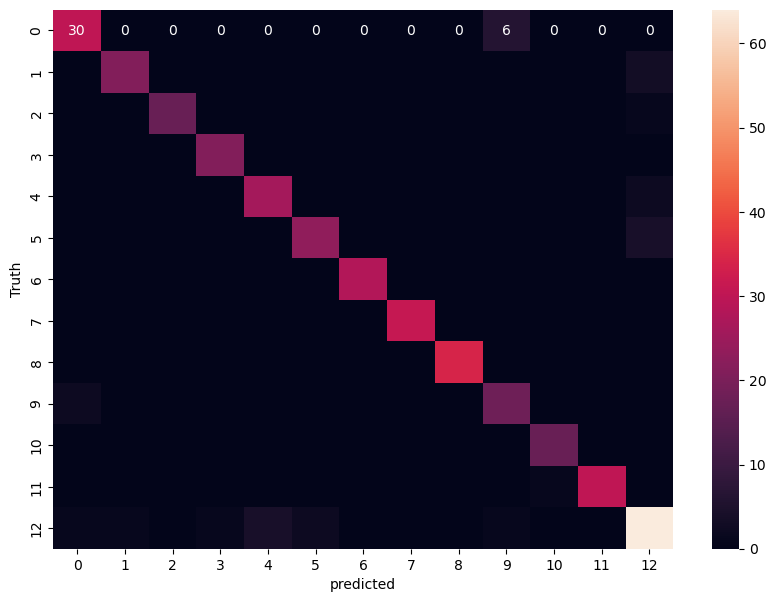

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True )
plt.xlabel('predicted')
plt.ylabel('Truth')